In [1]:
import os

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Setup fastText on Colab
I needed a pretrained language identification model that was fast and accurate. 
That's where I came across [fastText](https://fasttext.cc/blog/2017/10/02/blog-post.html) by Faceboook team. The model achieved over 98% accuracy in EuroGov dataset which consist of many different European languages. We can expect alot of different European languages being used in the Amsterdam Airbnb Reviews.

In [0]:
os.chdir("./drive/My Drive/Colab Notebooks/fastText")

In [3]:
! git clone https://github.com/facebookresearch/fastText.git
% cd fastText
! pip install .
! cd ../
! pwd

Cloning into 'fastText'...
remote: Enumerating objects: 3197, done.
remote: Total 3197 (delta 0), reused 0 (delta 0), pack-reused 3197
Receiving objects: 100% (3197/3197), 7.84 MiB | 12.97 MiB/s, done.
Resolving deltas: 100% (2007/2007), done.
Checking out files: 100% (508/508), done.
/content/drive/My Drive/Colab Notebooks/fastText/fastText
Processing /content/drive/My Drive/Colab Notebooks/fastText/fastText
  Stored in directory: /tmp/pip-ephem-wheel-cache-vbfnnmly/wheels/f0/a7/f3/1c2fcbb3da6c4774b66c0d66b59bf4650f0433d55d8d03a1ef
Successfully built fasttext
/content/drive/My Drive/Colab Notebooks/fastText/fastText


In [0]:
from fastText import load_model

%load_ext autoreload
%autoreload 2

## Download fastText pretrained model

In [ ]:
! wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz

In [6]:
# check that the pretrained model path is correct.
# https://fasttext.cc/docs/en/language-identification.html
model_path = '../lid.176.ftz'
os.path.exists(model_path)

True

## Load and test model 

In [10]:
loaded_model = load_model(model_path)
loaded_model.predict('Tutto perfetto...')

(('__label__it',), array([0.55371433]))

In [0]:
# model outputs the predicted language in iso code.
# created a dictionary for converting the iso codes.
iso_code = {"gv": "Manx", "gu": "Gujarati", "gd": "Scottish Gaelic", "ga": "Irish", "gn": "Guaran\\u00ed", "gl": "Galician", "lg": "Luganda", "lb": "Luxembourgish", "la": "Latin", "ln": "Lingala", "lo": "Lao", "tt": "Tatar", "tr": "Turkish", "ts": "Tsonga", "li": "Limburgish", "lv": "Latvian", "to": "Tonga", "lt": "Lithuanian", "lu": "Luba-Katanga", "tk": "Turkmen", "th": "Thai", "ti": "Tigrinya", "tg": "Tajik", "te": "Telugu", "ta": "Tamil", "yi": "Yiddish", "yo": "Yoruba", "de": "German", "da": "Danish", "dz": "Dzongkha", "st": "Southern Sotho", "dv": "Divehi; Maldivian;", "qu": "Quechua", "el": "Greek, Modern", "eo": "Esperanto", "en": "English", "zh": "Chinese", "ee": "Ewe", "za": "Zhuang, Chuang", "mh": "Marshallese", "uk": "Ukrainian", "eu": "Basque", "et": "Estonian", "es": "Spanish; Castilian", "ru": "Russian", "rw": "Kinyarwanda", "rm": "Romansh", "rn": "Kirundi", "ro": "Romanian, Moldavan", "bn": "Bengali", "be": "Belarusian", "bg": "Bulgarian", "ba": "Bashkir", "wa": "Walloon", "wo": "Wolof", "bm": "Bambara", "jv": "Javanese", "bo": "Tibetan", "bh": "Bihari", "bi": "Bislama", "br": "Breton", "bs": "Bosnian", "ja": "Japanese", "om": "Oromo", "oj": "Ojibwe, Ojibwa", "ty": "Tahitian", "oc": "Occitan", "tw": "Twi", "os": "Ossetian, Ossetic", "or": "Oriya", "xh": "Xhosa", "ch": "Chamorro", "co": "Corsican", "ca": "Catalan; Valencian", "ce": "Chechen", "cy": "Welsh", "cs": "Czech", "cr": "Cree", "cv": "Chuvash", "cu": "Old Church Slavonic", "ve": "Venda", "ps": "Pashto, Pushto", "pt": "Portuguese", "tl": "Tagalog", "pa": "Panjabi, Punjabi", "vi": "Vietnamese", "pi": "P\\u0101li", "is": "Icelandic", "pl": "Polish", "hz": "Herero", "hy": "Armenian", "hr": "Croatian", "iu": "Inuktitut", "ht": "Haitian", "hu": "Hungarian", "hi": "Hindi", "ho": "Hiri Motu", "ha": "Hausa", "he": "Hebrew (modern)", "mg": "Malagasy", "uz": "Uzbek", "ml": "Malayalam", "mn": "Mongolian", "mi": "M\\u0101ori", "ik": "Inupiaq", "mk": "Macedonian", "ur": "Urdu", "mt": "Maltese", "ms": "Malay", "mr": "Marathi (Mar\\u0101\\u1e6dh\\u012b)", "ug": "Uighur, Uyghur", "my": "Burmese", "ki": "Kikuyu, Gikuyu", "aa": "Afar", "ab": "Abkhaz", "ae": "Avestan", "ss": "Swati", "af": "Afrikaans", "tn": "Tswana", "sw": "Swahili", "ak": "Akan", "am": "Amharic", "it": "Italian", "an": "Aragonese", "ii": "Nuosu", "ia": "Interlingua", "as": "Assamese", "ar": "Arabic", "su": "Sundanese", "io": "Ido", "av": "Avaric", "ay": "Aymara", "az": "Azerbaijani", "ie": "Interlingue", "id": "Indonesian", "ig": "Igbo", "sk": "Slovak", "sr": "Serbian", "nl": "Dutch", "nn": "Norwegian Nynorsk", "no": "Norwegian", "na": "Nauru", "nb": "Norwegian Bokm\\u00e5l", "nd": "North Ndebele", "ne": "Nepali", "ng": "Ndonga", "ny": "Chichewa; Chewa; Nyanja", "vo": "Volap\\u00fck", "zu": "Zulu", "so": "Somali", "nr": "South Ndebele", "nv": "Navajo, Navaho", "sn": "Shona", "fr": "French", "sm": "Samoan", "fy": "Western Frisian", "sv": "Swedish", "fa": "Persian", "ff": "Fula", "fi": "Finnish", "fj": "Fijian", "sa": "Sanskrit (Sa\\u1e41sk\\u1e5bta)", "fo": "Faroese", "ka": "Georgian", "kg": "Kongo", "kk": "Kazakh", "kj": "Kwanyama, Kuanyama", "sq": "Albanian", "ko": "Korean", "kn": "Kannada", "km": "Khmer", "kl": "Kalaallisut", "ks": "Kashmiri", "kr": "Kanuri", "si": "Sinhala, Sinhalese", "kw": "Cornish", "kv": "Komi", "ku": "Kurdish", "sl": "Slovene", "sc": "Sardinian", "ky": "Kirghiz, Kyrgyz", "sg": "Sango", "se": "Northern Sami", "sd": "Sindhi"}

In [36]:
iso_code['__label__el'.split("__label__")[-1]]

'Greek, Modern'

In [33]:
import pandas as pd
df = pd.read_csv("../lang_detection_use.csv", names=['comments'], index_col=0)
df.head()

,comments
0,Daniel is really cool. The place was nice and ...
1,Daniel is the most amazing host! His place is ...
2,We had such a great time in Amsterdam. Daniel ...
3,Very professional operation. Room is very clea...
4,Daniel is highly recommended. He provided all...


In [0]:
def get_language(ind_num, x, model):
    langs = model.predict(x)
    lang = langs[0][0].split("__label__")[-1]
    prob = langs[1][0]
    return {"language": lang, "probability": prob, "index": ind_num}

In [44]:
get_language(1, 'OTTIMO LOFT IN POSIZIONE MOLTO STRATEGICA ERAV'.lower(), loaded_model)

{'index': 1, 'language': 'it', 'probability': 0.991814136505127}

In [0]:
df['comments'] = df['comments'].apply(lambda x: x.replace("\n", ' ').lower())

In [0]:
comments_dict = df['comments'].reset_index().to_dict(orient='records')
lang_dict = [get_language(comment['index'], comment['comments'], loaded_model) for comment in comments_dict]

In [47]:
lang_df = pd.DataFrame(lang_dict)
lang_df.head()

,index,language,probability
0,0,en,0.992321
1,1,en,0.991255
2,2,en,0.995635
3,3,en,0.990710
4,4,en,0.967161


In [48]:
lang_df[lang_df.language.isna()]

,index,language,probability


In [49]:
lang_df.language.unique()

array(['en', 'fr', 'de', 'it', 'es', 'zh', 'da', 'pt', 'el', 'nl', 'ru',
       'hu', 'ko', 'tr', 'pl', 'cs', 'ja', 'fi', 'eo', 'sv', 'no', 'af',
       'ml', 'ro', 'la', 'et', 'is', 'ca', 'he', 'gl', 'id', 'ceb', 'hr',
       'bs', 'sk', 'th', 'ar', 'sr', 'sh', 'war', 'hi', 'bg', 'jbo', 'eu',
       'uk', 'sl', 'nn', 'bar', 'vi', 'lt', 'fa', 'ast', 'ka', 'ms', 'tt',
       'yue', 'br', 'tl', 'ilo', 'ur', 'cy', 'wuu', 'vls', 'dv', 'als',
       'nds', 'lv'], dtype=object)

In [50]:
lang_df.set_index("index", inplace=True)
joined_df = df.join(lang_df, on=None, how='left', lsuffix='', rsuffix='', sort=False)
joined_df.head()

,comments,language,probability
0,daniel is really cool. the place was nice and ...,en,0.992321
1,daniel is the most amazing host! his place is ...,en,0.991255
2,we had such a great time in amsterdam. daniel ...,en,0.995635
3,very professional operation. room is very clea...,en,0.990710
4,daniel is highly recommended. he provided all...,en,0.967161


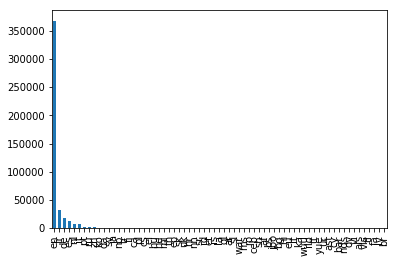

In [54]:
lang_freq = joined_df.language.value_counts()
lang_freq.plot(kind='bar')

In [0]:
joined_df.to_csv("../with_language_identified.csv", index=False)